<a href="https://colab.research.google.com/github/mkt-sard/Python-with-Google-Colab/blob/main/stockx_sneakers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing packages that we need for analyzing and visualizing data
!pip install pandas
!pip install numpy
!pip install matplotlib

In [ ]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load your dataset into a Pandas DataFrame
#Import the data from your local computer
from google.colab import files
uploaded = files.upload()

Saving StockXdata.xlsx to StockXdata.xlsx


In [ ]:
#read the data
data = pd.read_excel('StockXdata.xlsx')

In [ ]:
#printing the first 20 rows of data for inspection
data.head(20)

,Product Description,Lowest Ask Price,Model,Units Sold,Brand
0,Nike Dunk Low Photon Dust (Women's),90,Nike Dunk L,NaN,Nike
1,adidas Yeezy Slide Slate Grey,81,adidas Yeez,NaN,adidas
2,Nike Dunk Low Retro White Black Panda,107,Nike Dunk L,NaN,Nike
3,Nike Dunk Low Grey Fog,110,Nike Dunk L,NaN,Nike
4,adidas Campus 00s Core Black,88,adidas Camp,NaN,adidas
5,UGG Tasman Slipper Chestnut (Women's),122,UGG Tasman,NaN,UGG
6,Jordan 11 Retro DMP Gratitude (2023),208,Jordan 11 R,NaN,Jordan
7,UGG Tazz Slipper Chestnut (Women's),122,UGG Tazz Sl,NaN,UGG
8,Crocs Classic Clog Lightning McQueen,82,Crocs Class,NaN,Crocs
9,Nike Dunk Low Cacao Wow (Women's),104,Nike Dunk L,NaN,Nike


In [ ]:
#Inspecting the data types
print(data.dtypes)

Product Description     object
Lowest Ask Price         int64
Model                   object
Units Sold             float64
Brand                   object
Avg_Price_Per_Brand    float64
Avg_units_Per_Brand    float64
dtype: object


In [ ]:
#shortcut to obtain the basic descriptive statistics
data.describe()

,Lowest Ask Price,Units Sold
count,1000.000000,75.000000
mean,121.550000,568.760000
std,41.338921,90.340922
min,67.000000,449.000000
25%,88.000000,449.000000
50%,110.500000,592.000000
75%,140.250000,665.000000
max,215.000000,665.000000


In [ ]:
# Shape returns the number of rows and columns in a data frame
data.shape

(1000, 5)

In [ ]:
#missing value function
data.isna()

,Product Description,Lowest Ask Price,Model,Units Sold,Brand
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
995,False,False,False,True,False
996,False,False,False,True,False
997,False,False,False,True,False
998,False,False,False,False,False


In [ ]:
# How to obtain the number of missing values in each column
missing_values_in_Units_sold = data['Units Sold'].isnull().sum()
print(f"Number of missing values in column Units Sold: {missing_values_in_Units_sold}")

Number of missing values in column Units Sold: 925


In [ ]:
#replacing missing values with 0 in Units Sold Column
data['Units Sold'] = data['Units Sold'].fillna(0)

In [ ]:
#np.mean function to obtain mean for individual columns
np.mean(data['Lowest Ask Price'])

121.55

In [ ]:
#np.median function to obtain mean for individual columns
np.median(data['Lowest Ask Price'])

110.5

In [ ]:
#how to create a new column to calculate average lowest ask price for each brand
avg_price_per_brand = data.groupby('Brand')['Lowest Ask Price'].mean()
data['Avg_Price_Per_Brand'] = data['Brand'].map(avg_price_per_brand)

In [ ]:
#Printing the first 20 rows to check the new column
data.head(20)

,Product Description,Lowest Ask Price,Model,Units Sold,Brand,Avg_Price_Per_Brand
0,Nike Dunk Low Photon Dust (Women's),90,Nike Dunk L,0.0,Nike,117.466667
1,adidas Yeezy Slide Slate Grey,81,adidas Yeez,0.0,adidas,102.888889
2,Nike Dunk Low Retro White Black Panda,107,Nike Dunk L,0.0,Nike,117.466667
3,Nike Dunk Low Grey Fog,110,Nike Dunk L,0.0,Nike,117.466667
4,adidas Campus 00s Core Black,88,adidas Camp,0.0,adidas,102.888889


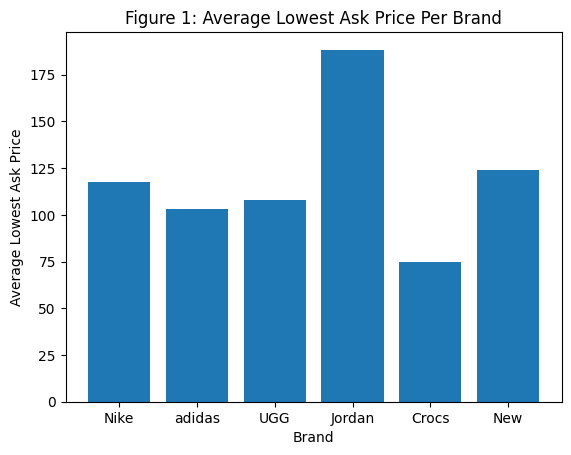

In [ ]:
#how to create a bar plot
plt.bar(data['Brand'], data['Avg_Price_Per_Brand'])
#Adding the x and y labels
plt.xlabel('Brand')
plt.ylabel('Average Lowest Ask Price')

# Adding the title
plt.title('Figure 1: Average Lowest Ask Price Per Brand')

plt.show()

In [ ]:
np.mean(data['Units Sold'])

568.76

In [ ]:
#how to create a new column to calculate average Units Sold for each brand
avg_units_per_brand = data.groupby('Brand')['Units Sold'].mean()
data['Avg_units_Per_Brand'] = data['Brand'].map(avg_units_per_brand)

In [ ]:
data.head(10)

,Product Description,Lowest Ask Price,Model,Units Sold,Brand,Avg_Price_Per_Brand,Avg_units_Per_Brand
0,Nike Dunk Low Photon Dust (Women's),90,Nike Dunk L,0.0,Nike,117.466667,69.418667
1,adidas Yeezy Slide Slate Grey,81,adidas Yeez,0.0,adidas,102.888889,0.000000
2,Nike Dunk Low Retro White Black Panda,107,Nike Dunk L,0.0,Nike,117.466667,69.418667
3,Nike Dunk Low Grey Fog,110,Nike Dunk L,0.0,Nike,117.466667,69.418667
4,adidas Campus 00s Core Black,88,adidas Camp,0.0,adidas,102.888889,0.000000
5,UGG Tasman Slipper Chestnut (Women's),122,UGG Tasman,0.0,UGG,107.833333,0.000000
6,Jordan 11 Retro DMP Gratitude (2023),208,Jordan 11 R,0.0,Jordan,188.333333,110.833333
7,UGG Tazz Slipper Chestnut (Women's),122,UGG Tazz Sl,0.0,UGG,107.833333,0.000000
8,Crocs Classic Clog Lightning McQueen,82,Crocs Class,0.0,Crocs,74.500000,0.000000
9,Nike Dunk Low Cacao Wow (Women's),104,Nike Dunk L,0.0,Nike,117.466667,69.418667


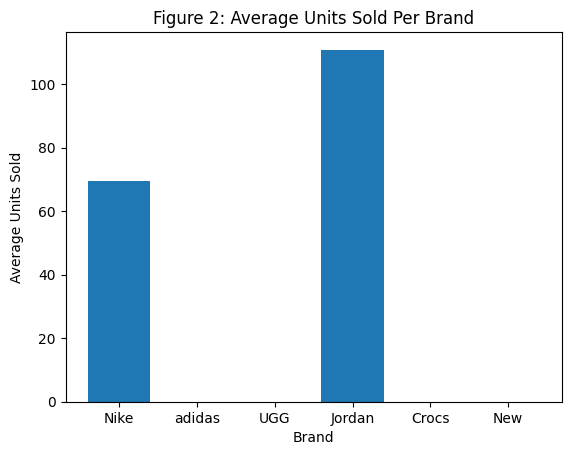

In [ ]:
#bar plot to visulize average units sold per brand
#how to create a bar plot
plt.bar(data['Brand'], data['Avg_units_Per_Brand'])
#Adding the x and y labels
plt.xlabel('Brand')
plt.ylabel('Average Units Sold')

# Adding the title
plt.title('Figure 2: Average Units Sold Per Brand')

plt.show()

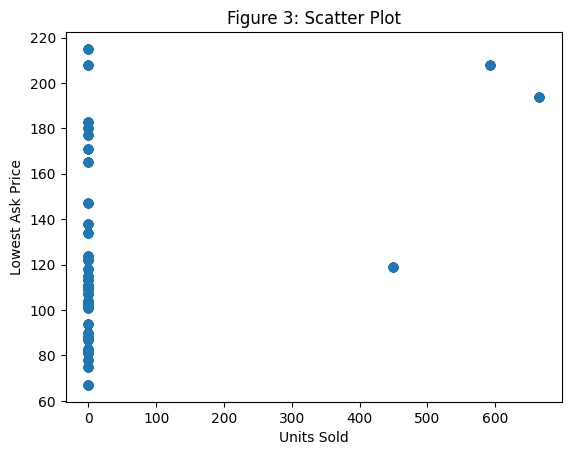

In [ ]:
#how to create a bar plot
plt.scatter(data['Units Sold'], data['Lowest Ask Price'])
#Adding the x and y labels
plt.xlabel('Units Sold')
plt.ylabel('Lowest Ask Price')

# Adding the title
plt.title('Figure 3: Scatter Plot')

plt.show()

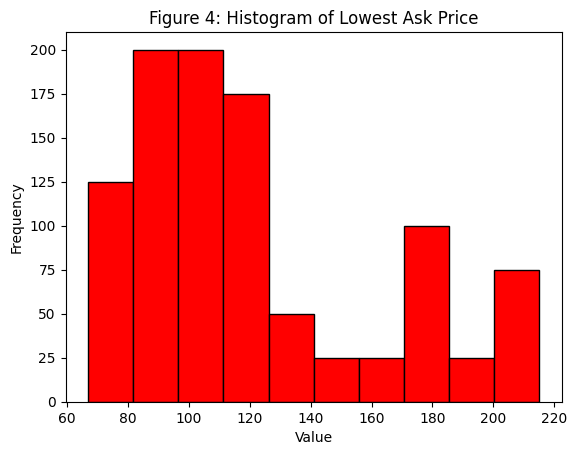

In [ ]:
# Creating the histogram
plt.hist(data['Lowest Ask Price'], color='red', bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Figure 4: Histogram of Lowest Ask Price')

# Display the plot
plt.show()

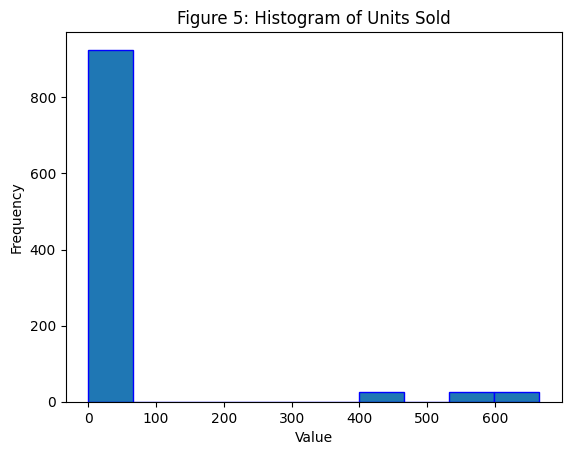

In [ ]:
# Creating the histogram
plt.hist(data['Units Sold'], bins=10, edgecolor='blue')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Figure 5: Histogram of Units Sold')

# Display the plot
plt.show()

In [ ]:
#filtering the rows with zero value in Units Sold Column
filtered_data = data[data['Units Sold'] > 0]['Units Sold']

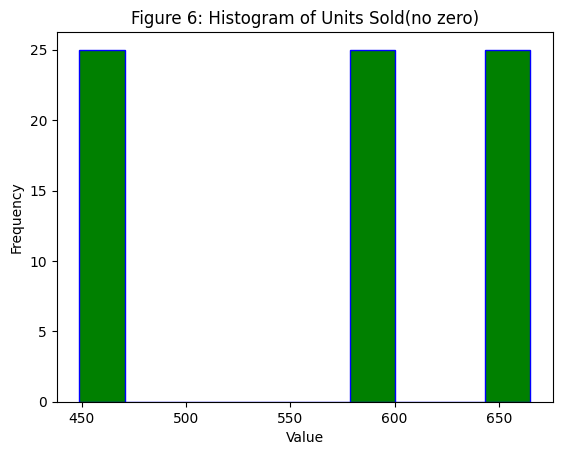

In [ ]:
# Creating the histogram
plt.hist(filtered_data, bins=10, color='green', edgecolor='blue')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Figure 6: Histogram of Units Sold(no zero)')

# Display the plot
plt.show()

In [ ]:
#finds the index of the maximum value
idx_max = data['Lowest Ask Price'].idxmax()
product_max_price = data.loc[idx_max, 'Model']
print("Product with the highest lowest ask price:", product_max_price,"for", data['Product Description'].iloc[idx_max])

Product with the highest lowest ask price: Jordan 4 Re for Jordan 4 Retro Red Cement


In [ ]:
#finds the index of the minimum value
idx_min = data['Lowest Ask Price'].idxmin()
product_min_price = data.loc[idx_min, 'Model']
print("Product with the lowest lowest ask price:", product_min_price,"for", data['Product Description'].iloc[idx_min])

Product with the lowest lowest ask price: UGG Tasman  for UGG Tasman II Slipper Chesnut (Kids)


In [ ]:
# Save the DataFrame as an Excel file in your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Assuming 'data' is a pandas DataFrame
data.to_excel('/content/drive/My Drive/StockX3.xlsx', encoding='utf-8-sig')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)
